Matplotlib is building the font cache; this may take a moment.


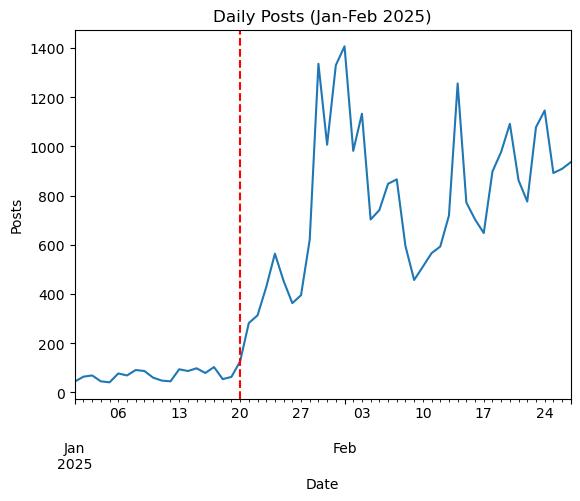

Top 10 Active Users:
 author
[deleted]               248
presfenol                92
Next-Coconut8461         58
AlarmingHat5154          44
Great_Explanation_64     43
FedUnionist              39
Mynameis__--__           37
Cold-Memory-2493         33
Simple_Panda6232         33
N0rma1_guy               33
Name: count, dtype: int64

Engagement Trends:
         avg_comments   avg_score
period                          
After      22.838468  159.868879
Before     28.585736   38.945372


In [1]:

import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_json("2_months_data/filtered_posts.jsonl", lines=True)

# Convert timestamp to datetime
df["date"] = pd.to_datetime(df["created_utc"], unit="s")

# Daily post volume
daily_posts = df.set_index("date").resample("D").size()
daily_posts.plot(title="Daily Posts (Jan-Feb 2025)")
plt.xlabel("Date")
plt.ylabel("Posts")
plt.axvline(pd.Timestamp("2025-01-20"), color="red", linestyle="--", label="Event")
plt.show()

# Top 10 active users
top_users = df["author"].value_counts().head(10)
print("Top 10 Active Users:\n", top_users)

# Engagement metrics (pre/post event)
event_date = pd.Timestamp("2025-01-20")
df["period"] = df["date"].apply(lambda x: "Before" if x < event_date else "After")

engagement = df.groupby("period").agg(
    avg_comments=("num_comments", "mean"),
    avg_score=("score", "mean")
)
print("\nEngagement Trends:\n", engagement)

Objective: Track changes in posting frequency and engagement around Jan 20, 2025.

Key Metrics:
Daily post volume (before/after event).

Top active users (author).

Engagement trends (num_comments, score).

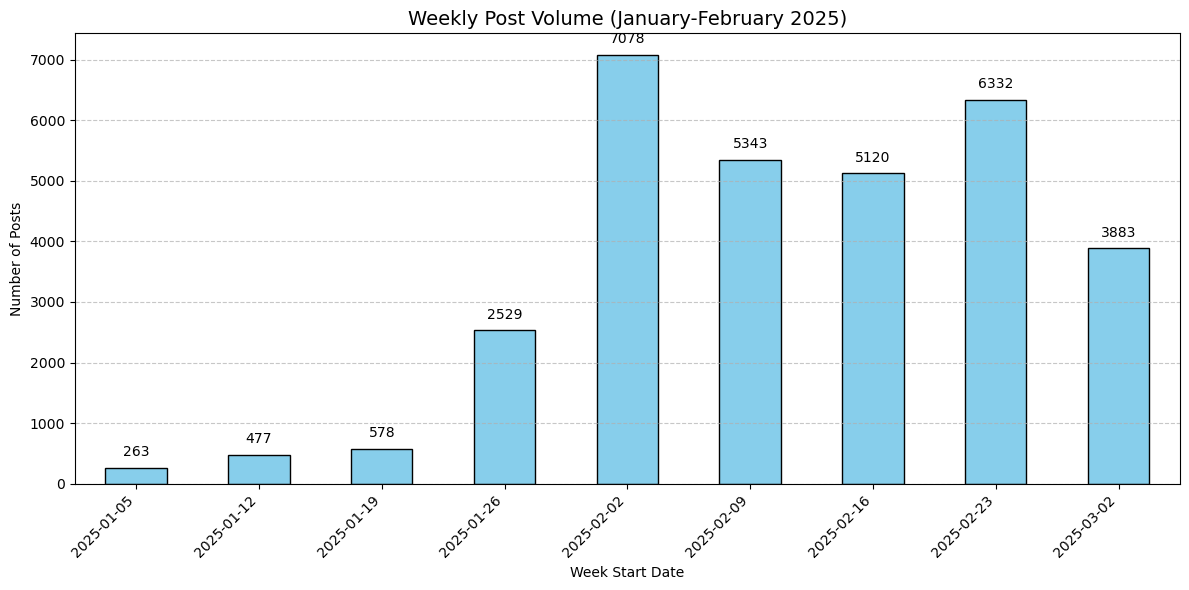

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load filtered data
df = pd.read_json("2_months_data/filtered_posts.jsonl", lines=True)

# Convert timestamp to datetime
df["date"] = pd.to_datetime(df["created_utc"], unit="s")

# Group posts by week
weekly_posts = df.resample('W', on='date').size()

# Plot
plt.figure(figsize=(12, 6))
ax = weekly_posts.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize x-axis labels to show week start dates
ax.set_xticks(range(len(weekly_posts)))
ax.set_xticklabels(
    [date.strftime("%Y-%m-%d") for date in weekly_posts.index],
    rotation=45,
    ha='right'
)

# Add frequency labels on top of bars
for i, (date, count) in enumerate(weekly_posts.items()):
    ax.text(
        i, 
        count + (0.02 * weekly_posts.max()),  # Offset label slightly above bar
        f'{count}',
        ha='center',
        va='bottom'
    )

# Style
plt.title("Weekly Post Volume (January-February 2025)", fontsize=14)
plt.xlabel("Week Start Date")
plt.ylabel("Number of Posts")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save or display
plt.savefig("weekly_post_volume.png", dpi=300, bbox_inches='tight')
plt.show()

Topic Evolution Analysis
Objective: Identify dominant topics (e.g., "Fed-Firing", "ICE") and track their prevalence. also visualize using bar chart and worldcloud.

Key Metrics:
Keyword frequency (e.g., "layoff", "policy").

Topic clusters (LDA).

Flair-based trends (link_flair_text).

<>:8: SyntaxWarning: invalid escape sequence '\['
<>:8: SyntaxWarning: invalid escape sequence '\['
/tmp/ipykernel_787524/3012419818.py:8: SyntaxWarning: invalid escape sequence '\['
  df["text"] = df["text"].str.replace("\[removed\]|\[deleted\]", "", regex=True, case=False)


Top Keywords:
 federal         936.348089
employees       854.978350
email           677.949569
opm             604.579807
just            578.216225
probationary    567.719207
work            503.919635
government      439.845312
workers         430.132720
https           427.756443
people          426.439900
doge            414.109263
new             413.685308
employee        410.329906
know            410.315784
agency          393.734433
don             391.379829
job             391.107115
fired           390.526701
trump           381.611374
office          381.310117
rto             380.476375
fed             374.902079
fork            365.254654
like            359.285632
going           350.651552
time            347.451683
dod             339.804809
rif             337.922889
musk            327.836971
resignation     312.211853
com             297.625511
service         296.844716
today           296.743317
feds            292.859800
does            281.692976
question     

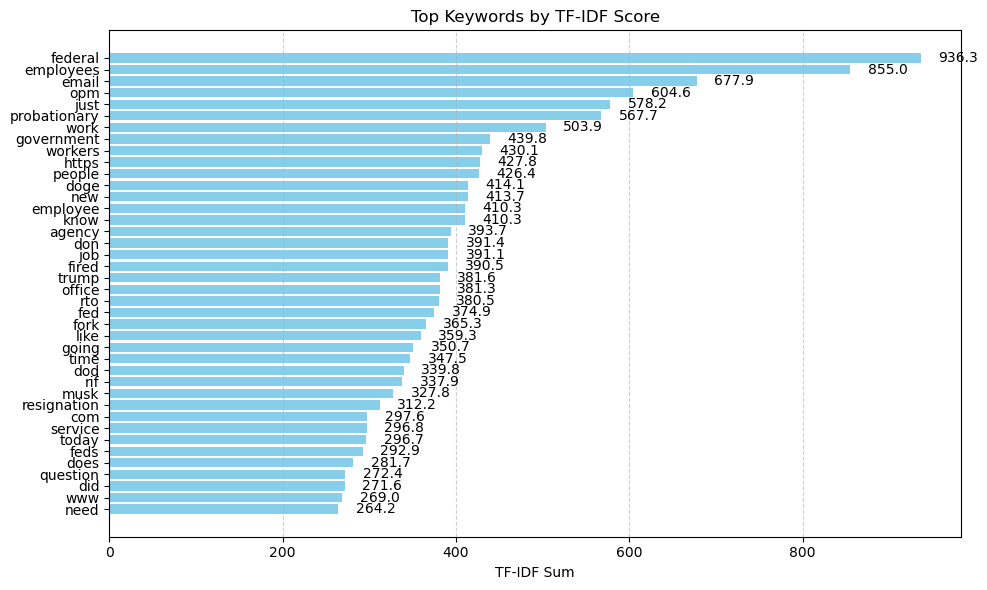

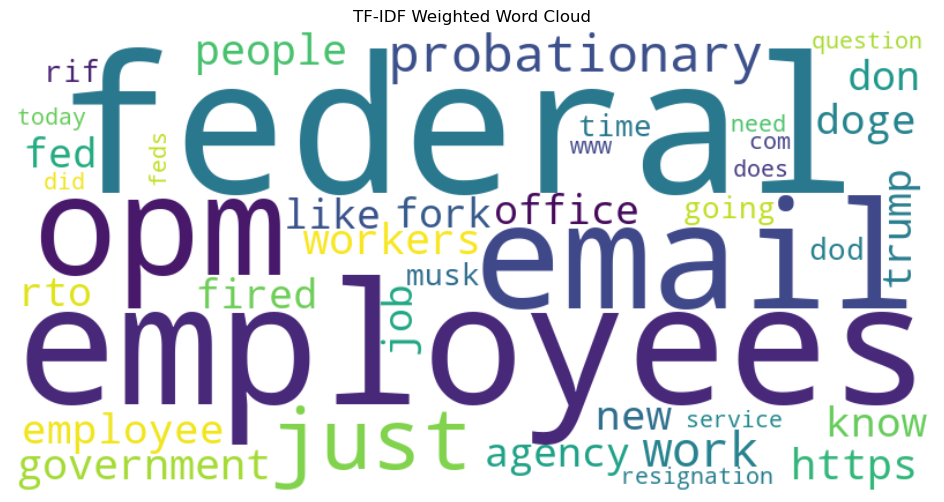

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Combine title and selftext
df["text"] = df["title"] + " " + df["selftext"]

# Clean the text column
df["text"] = df["text"].str.replace("\[removed\]|\[deleted\]", "", regex=True, case=False)

# TF-IDF for keyword extraction
tfidf = TfidfVectorizer(stop_words="english", max_features=1000)
tfidf_matrix = tfidf.fit_transform(df["text"])

# Top keywords
keywords = pd.Series(
    tfidf_matrix.sum(axis=0).A1,
    index=tfidf.get_feature_names_out()
).sort_values(ascending=False).head(40)
print("Top Keywords:\n", keywords)


import matplotlib.pyplot as plt

# Convert keywords to DataFrame
keywords_df = keywords.reset_index()
keywords_df.columns = ["word", "tfidf_sum"]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(keywords_df["word"], keywords_df["tfidf_sum"], color="skyblue")
plt.xlabel("TF-IDF Sum")
plt.title("Top Keywords by TF-IDF Score")
plt.gca().invert_yaxis()  # Highest score at top
plt.grid(axis="x", linestyle="--", alpha=0.6)

# Add labels
for i, v in enumerate(keywords_df["tfidf_sum"]):
    plt.text(v + 20, i, f"{v:.1f}", va="center")

plt.tight_layout()
plt.show()



from wordcloud import WordCloud

# Convert TF-IDF scores to a dictionary
word_weights = keywords.to_dict()

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white")
wordcloud.generate_from_frequencies(word_weights)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("TF-IDF Weighted Word Cloud")
plt.show()



## need to investigate whether high tf-idf of "removed" is coming from posts or it's a moderation artifact

In [8]:
removed_posts = df[df["selftext"].str.contains("removed", na=False) | 
                df["title"].str.contains("removed", na=False)]
print(f"Posts with '[removed]': {len(removed_posts)}")

Posts with '[removed]': 15677


## 15677 posts with no selftext, only the value removed, need to check if this affected other analysis. maybe not because this is the first time i am analyzing post texts.

# LDA Topic Modeling

In [ ]:
# LDA Topic Modeling
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(tfidf_matrix)

# Print topics
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx}:")
    print([tfidf.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print()

# Flair analysis
flair_counts = df.groupby(["period", "link_flair_text"]).size().unstack()
flair_counts.plot(kind="bar", stacked=True, title="Flair Trends")
plt.show()